# Strong Scaling

In [9]:
import sys
sys.path.insert(0,"/home/lg3u19/Documents/OnetepUtils/OnePY")
import onetep_v0_1 as op
import pathlib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [10]:
# remove all the slurm .out files from directory
for directory in pathlib.Path.cwd().iterdir():
    if directory.is_dir():
        !rm $directory/slurm*

rm: cannot remove ‘/home/lg3u19/Documents/PerformanceTesting/strong_scaling/n03/slurm*’: No such file or directory
rm: cannot remove ‘/home/lg3u19/Documents/PerformanceTesting/strong_scaling/n16/slurm*’: No such file or directory
rm: cannot remove ‘/home/lg3u19/Documents/PerformanceTesting/strong_scaling/n05/slurm*’: No such file or directory
rm: cannot remove ‘/home/lg3u19/Documents/PerformanceTesting/strong_scaling/n18/slurm*’: No such file or directory
rm: cannot remove ‘/home/lg3u19/Documents/PerformanceTesting/strong_scaling/n24/slurm*’: No such file or directory
rm: cannot remove ‘/home/lg3u19/Documents/PerformanceTesting/strong_scaling/n07/slurm*’: No such file or directory
rm: cannot remove ‘/home/lg3u19/Documents/PerformanceTesting/strong_scaling/n13/slurm*’: No such file or directory
rm: cannot remove ‘/home/lg3u19/Documents/PerformanceTesting/strong_scaling/n10/slurm*’: No such file or directory
rm: cannot remove ‘/home/lg3u19/Documents/PerformanceTesting/strong_scaling/.ipy

In [11]:
raw = op.load_from_dir("./",pass_format_flag=False)

In [12]:
for key in raw.keys():
    for nested_key in raw[key].keys():
        raw[key][nested_key].get_all()

In [13]:
raw

{'n03': {'p016_20': <onetep_v0_1.ONETEP at 0x7f31de160ac8>},
 'n16': {'p016_20': <onetep_v0_1.ONETEP at 0x7f31de160a90>},
 'n05': {'p016_20': <onetep_v0_1.ONETEP at 0x7f31de160128>},
 'n18': {'p016_20': <onetep_v0_1.ONETEP at 0x7f31de160e48>},
 'n24': {'p016_20': <onetep_v0_1.ONETEP at 0x7f31de160b70>},
 'n07': {'p016_20': <onetep_v0_1.ONETEP at 0x7f31de160160>},
 'n13': {'p016_20': <onetep_v0_1.ONETEP at 0x7f31de1606a0>},
 'n10': {'p016_20': <onetep_v0_1.ONETEP at 0x7f31ddaa4748>},
 'n02': {'p016_20': <onetep_v0_1.ONETEP at 0x7f31de19b4e0>},
 'n32': {'p016_20': <onetep_v0_1.ONETEP at 0x7f31de2442e8>}}

In [14]:
temp_dict = {}
for key in raw.keys():
    for nested_key in raw[key].keys():
        temp_dict[key]=[raw[key][nested_key].time_total,raw[key][nested_key].atoms_total]
timings = pd.DataFrame.from_dict(temp_dict,columns=["time",'atoms'],orient='index')
timings = timings.sort_values(by=['time'])
timings['time_m']=timings['time']/60.0
timings['nodes']=timings.index.str.slice(start=1)
timings['nodes']=timings['nodes'].astype('int')
timings['cores']=timings['nodes']*40
timings['speedup']=1.2/timings['time_m']
timings

,time,atoms,time_m,nodes,cores,speedup
n32,1121.714,1712,18.695233,32,1280,0.064187
n24,1149.877,1712,19.164617,24,960,0.062615
n18,1170.300,1712,19.505000,18,720,0.061523
n16,1316.279,1712,21.937983,16,640,0.054700
n13,1433.181,1712,23.886350,13,520,0.050238
n10,1656.212,1712,27.603533,10,400,0.043473
n07,2119.538,1712,35.325633,7,280,0.033970
n05,3037.842,1712,50.630700,5,200,0.023701
n03,4258.590,1712,70.976500,3,120,0.016907
n02,5918.101,1712,98.635017,2,80,0.012166


Text(0.5, 1.0, 'Strong Scaling')

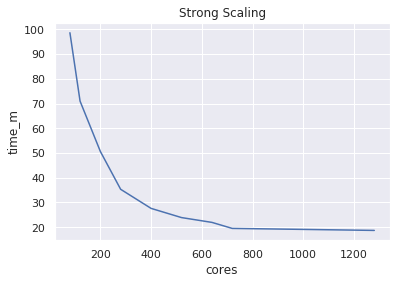

In [15]:
plot = sns.lineplot(data=timings,x='cores',y='time_m')
plot.set_title('Strong Scaling')


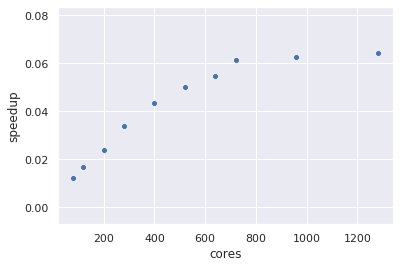

In [22]:

plot = sns.scatterplot(data=timings,x='cores',y='speedup')